In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lok+Sabha_2019.csv')

In [3]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


# 1. Which State/UT contributes to the least number of total votes? Which State/UT contributes to the most number of total votes?

<AxesSubplot:xlabel='STATE'>

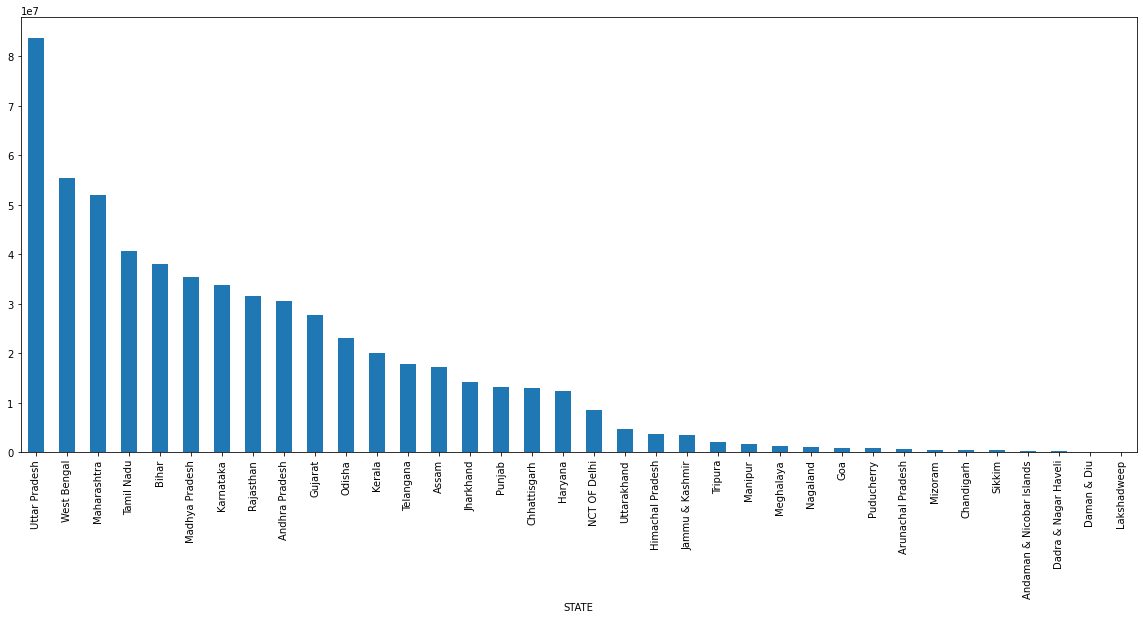

In [7]:
plt.figure(figsize=(20,8))
df.groupby('STATE').sum()['TOTAL VOTES'].sort_values(ascending = False).plot(kind = 'bar')

# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [10]:
df.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values(ascending = True)

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

# 3. Consider assets and liabilities. Describe and explain both across the Education level? Provide a detailed justification for your answer.

In [11]:
df.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values(ascending = False)

CONSTITUENCY
CHEVELLA          3927395902.00
CHHINDWARA        1655144708.25
GUNA              1296719487.00
NELLORE           1289469814.67
BANGALORE RURAL   1230421937.67
                       ...     
BOLPUR               4090779.40
ALIPURDUARS          3895905.50
GAYA (SC)            3796683.45
VILUPPURAM           3032143.33
ALATHUR              2165624.67
Name: ASSETS, Length: 539, dtype: float64

# 4. Are there any outliers in assets and liabilities across Education level? Back up your answer with a suitable plot/technique.

In [12]:
df_asset = df.groupby('EDUCATION')['ASSETS']

In [15]:
df_asset_dec = df_asset.describe().T

In [21]:
df_asset_dec.loc[('Total'), :] = df_asset.sum()

In [22]:
df_asset_dec.loc[('Total'), :]

EDUCATION
Basic Level      66495365996.00
Doctorate        11956606578.00
Graduate        114434653649.00
Illiterate        6847545113.00
Post Graduate    65804129095.00
Name: Total, dtype: float64

In [23]:
df_asset.sum()

EDUCATION
Basic Level      66495365996.00
Doctorate        11956606578.00
Graduate        114434653649.00
Illiterate        6847545113.00
Post Graduate    65804129095.00
Name: ASSETS, dtype: float64

In [25]:
df_asset_dec

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00


# 5. On the basis of the descriptive measure of variability, candidates with what education level shows the most and the least inconsistent behavior in the declared assets?

In [28]:
df_asset_dec.loc[('CV'), :] = df_asset_dec.loc[('std'), :]/df_asset_dec.loc[('mean'), :]
df_asset_dec

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00
CV,3.00,2.87,3.24,1.87,3.02
